# Course Recap

5~13 주차

    * Using Deep Learning Framework
    * Manipulate tensor, array
    * Build model architecture
    * Solve a few tasks using the model
    * Few techniques for your experiment

14 주차

    * 1~13 Recap. 
    * Think Further
        * What to study more
        * Overview of ML projects
        * Lifecycle of ML projects

## Week 5

<h3>Contents</h3>

- Numpy
    - Vectors & Matrices
        - Creation
        - Indexing & Assignment
        - Operation
        - Reshaping
    - Comparison with python lists
- PyTorch
    - Tensors
        - Creration
        - Operation
        - **Reshaping**

<h3>What to know</h3>

How to manipulate array and tensor

### Numpy

In [ ]:
# convert list to numpy array
a = [1, 2, 3, 4, 5]
np.array(a)

In [ ]:
# convert numpy array to list
np.ones(5).tolist()

In [ ]:
# you can specify data type
np.array([[1,2,3], [4,5,6]], dtype='float')

In [ ]:
# spaced values in interval
np.arange(0, 20, 2)

In [ ]:
# random floats in [0, 1)
np.random.random(10)

In [ ]:
# identity matrix
np.identity(3) == np.eye()

In [ ]:
# indexing
X = np.array([[1,2,3], [4,5,6]])
X
# get row
X[0, : ]
# get col
X[ : , 0]
# get multiple cols
X[ :, [0, 2]]

In [ ]:
z = np.arange(1, 7)
print(z.reshape(2, 3))
print(Z.reshape(6))
print(Z.flatten())
print(Z.T)

array([1, 2, 3, 4, 5, 6])

### Pytorch tensor

In [ ]:
t = torch.FloatTensor(2, 3)

In [ ]:
t.zero_()

In [ ]:
t = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

In [ ]:
t_zeros = torch.zeros_like(t)        # zeros_like returns a new tensor
t_ones = torch.ones(2, 3)            # creates a tensor with 1s
t_fives = torch.empty(2, 3).fill_(5) # creates a non-initialized tensor and fills it with 5
t_random = torch.rand(2, 3)          # creates a uniform random tensor
t_normal = torch.randn(2, 3)         # creates a normal random tensor

print(t_zeros)
print(t_ones)
print(t_fives)
print(t_random)
print(t_normal)

In [ ]:
# creates a new copy of the tensor that is still linked to 
# the computational graph (see below)

t1 = torch.clone(t)
print(id(t))
print(id(t1))

# To create a new _independent_ copy, we do need to detach 
# from the graph
t1 = torch.clone(t).detach()

In [ ]:
# Convert the array to a torch tensor
t = torch.tensor(a)

In [ ]:
#@title
u = torch.matmul(A, v)
print(u, u.shape) # [3, 1]
b = torch.randn(3, 1)
y = u + b
print(y)

# or you can use torch.add()
print(torch.add(u, b))

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

m1 = torch.FloatTensor([[1, 2], [3, 4]])m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2 # asterisk
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [ ]:
print(t.view(-1, 2))           # reorganizes the tensor to these dimensions
t.reshape()
print(t.unsqueeze(1))          # inserts a dimension
print(t.unsqueeze(1).squeeze())             # removes size 1 dimensions

print(torch.cat((t, t)))       # tensor([0, 1, 2, 0, 1, 2])
print(torch.stack((t, t)))     # tensor([[0, 1, 2],
                               #         [0, 1, 2]])

## Week 6

<h3>Contents</h3>

- Training Process

- PyTorch Modules
    - Optimizer(Automatic Gradient)
    - Loss Function
    - Neural Net
    - Activation Function


<h3>What to know</h3>

Whole traing process in your mind using Pytorch module

### Training Process

In [ ]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
W_check = []
loss_check = []
for epoch in range(nb_epochs):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # loss 계산
    loss = torch.mean((hypothesis - y_train) ** 2)

    W_check.append(W.clone())
    loss_check.append(loss)
    
    # grad 계산
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, loss: {:.6f}'.format(
        epoch+1, nb_epochs, W.item(), loss.item()
    ))

    # loss gradient로 H(x) 개선
    W -= lr * gradient


### Optimizer - Automatic Gradient Descent

In [ ]:
import torch.optim as optim

In [ ]:
optimizer = optim.SGD([W], lr=0.15)

In [ ]:
# loss로 H(x) 개선
optimizer.zero_grad()
loss.backward()
optimizer.step()

### Loss - torch.nn.Functional

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

In [ ]:
# loss 계산
loss = F.mse_loss(hypothesis, y_train)

Epoch    1/1 loss: 0.500000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  


In [ ]:
F.cross_ent_loss() 

### Neural Net - torch.nn.Module

In [ ]:
import torch.nn as nn

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

### Activation Func

In [ ]:
self.relu = torch.nn.ReLU()

## Week 7

<h3>Contents</h3>

- Reproducibility

- What is Batch Training?
- More about Pytorch Module
    - Dataset
    - DataLoader


<h3>What to know</h3>

1. Reproducibility
2. How to build your custom Dataset, DataLoader


### Reproducibility

In [ ]:
# In general seed PyTorch operations
torch.manual_seed(0)

In [ ]:
torch.randint(0, 10, (3,))

tensor([7, 3, 7])

### Batch Training

In [ ]:
for epoch in range(nb_epochs):
    for batch in range(total_batches):
        x_batch, y_batch = smaller_data


### Dataset

<h3> torch.utils.data.Dataset

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train = TensorDataset(xtr, ytr)
test = TensorDataset(xte, yte)

<h3> Building your custom dataset

3 Things you must define 

```
__init__
__getitem__
__len__
```



In [ ]:
from torch.utils.data import Dataset

In [ ]:
# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class MNISTDataset(Dataset):
    def __init__(self, path):
        # Initialize data, download, etc.
        # read with numpy or pandas
        df=pd.read_csv(path)
        arr=df.to_numpy()
        self.n_samples = arr.shape[0]

        # here the first column is the class label, the rest are the features
        x=arr[:,1:]
        y=arr[:,:1]

        # you can do some preprocessing here as well

        self.x_data = torch.from_numpy(x) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(y) # size [n_samples, 1]

        self.y_data = self.y_data.type(torch.LongTensor)

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

### DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=32)

In [ ]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=train,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)
test_loader = DataLoader(dataset=test,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)

In [ ]:
# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features.shape, labels.shape)

## Week 8

<h3>Contents</h3>

- Conv2d, Maxpool2d
- Sequential

- Gradient Vanishing Problem
- Regularization
- Batch Normalization


<h3>What to know</h3>

1. How to calculate Conv2d, Maxpool2d
2. How to use Droptout, BatchNorm

### nn.Conv2d()

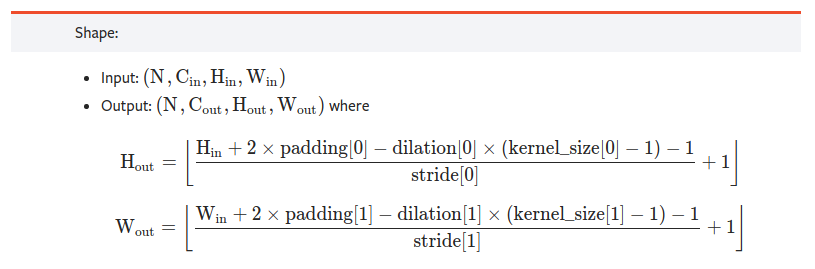

In [ ]:
input = torch.randn(20, 16, 50, 100)

In [ ]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
print(m(input).shape)

torch.Size([20, 33, 24, 49])


### nn.Maxpool2d

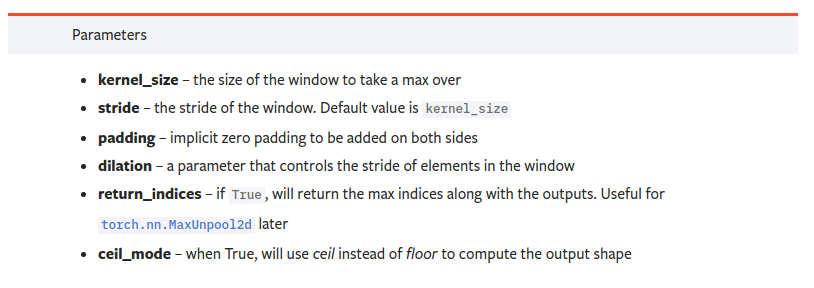

In [ ]:
# if we dont specify stride, then 
m = nn.MaxPool2d(5)
print(m(input).shape)

torch.Size([20, 16, 10, 20])


In [ ]:
m = nn.MaxPool2d(4, stride=3)
print(m(input).shape)

torch.Size([20, 16, 16, 33])


### nn.Sequential

In [ ]:
layer = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

In [ ]:
print(layer(input).shape)

torch.Size([20, 32, 25, 50])


### Gradient Vanishing Problem

In [ ]:
# nn.Sigmoid() -> nn.ReLU()

### Regularization



Early stopping

Dropout

### Batch Normalization

In [ ]:
layer_bn = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Dropout(0.2),    #
            nn.BatchNorm2d(32), # only LayerNorm() 
            nn.MaxPool2d(kernel_size=2, stride=2))

## Week 9 

<h3>Contents</h3>

- Learning rate decay
- Part1. Resnet
    - Skip connection
    - Import resnet
    - Load pretrained model

- Part2. Building Blocks
    - Start with small block
    - Build bigger model
    - Classifier
    - Final Model(VGG13)
    - Summarize

<h3>What to know</h3>

1. What is Skip Connection
2. How to build your model with subclasses

### Learning rate decay

In [ ]:
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, patience=3, verbose=True)

### Resnet - Skip connection

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out) # residual

        out += identity  # should be same size
        out = self.relu(out)

        return out

<h3> import Resnet from torchvision

In [ ]:
from torchvision.models import resnet18 as resnet

<h3> Load pretrained model

In [ ]:
# Get pre-trained model (with ImageNet)
pretrained = resnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


### Building Blocks


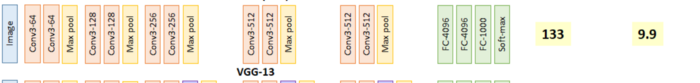

<h3> Start with small blocks

In [ ]:
class TestBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TestBlock, self).__init__()
        self.layer = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                                   nn.ReLU(inplace=True),
                                   nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
                                   nn.ReLU(inplace=True),
                                   nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
    def forward(self, x):
        return self.layer(x)

### Others

<h3> Summarize the model

In [ ]:
from torchsummary import summary
summary(model.cuda(), (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
         TestBlock-6         [-1, 64, 112, 112]               0
            Conv2d-7        [-1, 128, 112, 112]          73,856
              ReLU-8        [-1, 128, 112, 112]               0
            Conv2d-9        [-1, 128, 112, 112]         147,584
             ReLU-10        [-1, 128, 112, 112]               0
        MaxPool2d-11          [-1, 128, 56, 56]               0
        TestBlock-12          [-1, 128, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         295,168
             ReLU-14          [-1, 256,

## Week 10

<h3>Contents</h3>

- Pytorch RNN Module

- Implement recurrent neural network architecture
    - For one step
    - For all steps

- Apply RNN to stock prediction

<h3>What to know</h3>

1. How to use RNN Module
2. Which things to consider before you build RNN model

### Import RNN from torch module

In [ ]:
single_rnn = nn.RNN(
    input_size=input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    nonlinearity='tanh',
    batch_first=True,
    dropout=0,
    bidirectional=True    # num_directions = 1
)

### Implement recurrent neural network architecture for one step & all steps

In [ ]:
class RNNstep(nn.Module):
    def __init__(self, input_dim, hid_dim): 
        super(RNNstep, self).__init__()
        
        self.W = nn.Linear(input_dim, hid_dim, bias=False) 
        self.U = nn.Linear(hid_dim, hid_dim, bias=False)
        self.act = nn.Tanh()
        
    def forward(self, x, h_prev): # batch_size x input_dim // batch_size x hid_dim
        h_next = self.act(self.W(x) + self.U(h_prev))
        return h_next

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, num_classes, hid_dim, batch_size): 
        super(RNN, self).__init__()
        self.params = [input_dim, hid_dim, num_classes, batch_size]
        
        self.step_layer = RNNstep(self.params[0], self.params[1])
        self.output_layer = nn.Linear(hid_dim, num_classes) # V
        
        self.h = self.init_hidden()

    def init_hidden(self):
        return torch.zeros(self.params[3], self.params[1])

    def forward(self, xs):
        batch_size, seq_length, _ = xs.shape # batchsize x seq_length x input_dim

        outs = torch.zeros((batch_size, seq_length, self.params[2]))
        hs = torch.zeros((batch_size, seq_length, self.params[1]))

        for t in range(seq_length):
            # forward
            self.h = self.step_layer(xs[:, t, :], self.h)
            out = self.output_layer(self.h) # V(h)

            # save output and hidden_state 
            outs[:, t, :] = out
            hs[:, t, :] = self.h

        return outs, hs        

### Apply RNN to stock prediction

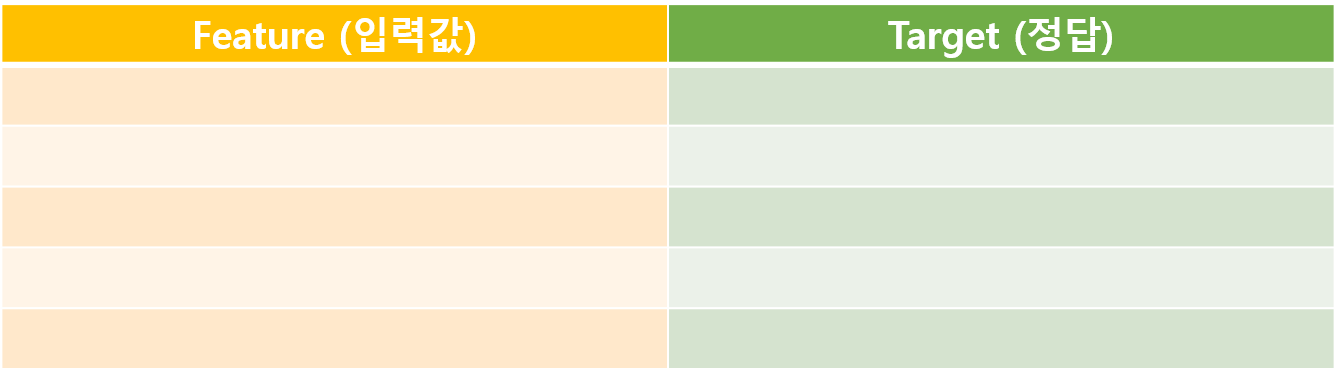

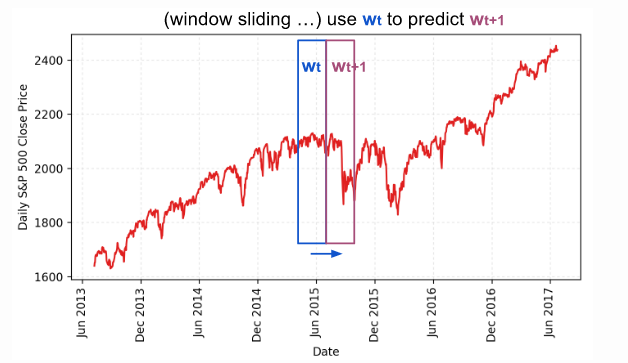

In [ ]:
def get_batches():

    yield data 

## Week 11

<h3>Contents</h3>

- Sequence Modeling
    - Many to Many
    - Many to One
- Dealing with text data
- Text generation practice

<h3>What to know</h3>

1. What is sequence modeling and what type of problem you are dealing with?
2. Things to know for text data
    - build vocabulary set
    - one hot encoding

### Sequence Modeling

### Many to Many & Many to One

<h3> Many to Many - Next word prediction

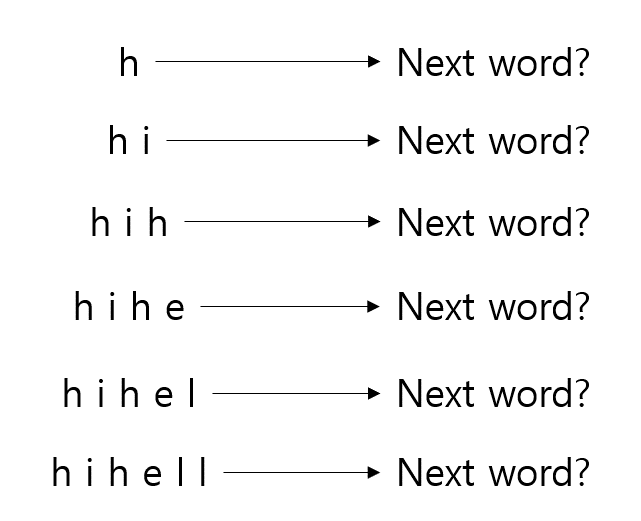

<h3> Many to One example - Gender classification

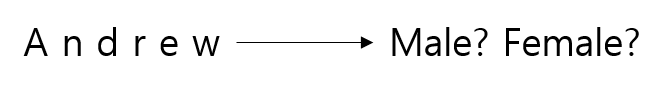

### Others

<h3> Build vocab dictionary </h3>

In [ ]:
sentences = ["andrew", "sophia"]

char_list = list(set([x for sent in sentences for x in list(sent)]))
char_list.sort()
char2idx = {w: i for i, w in enumerate(char_list)}
idx2char = {i: w for i, w in enumerate(char_list)}

In [ ]:
print(char_list)

['a', 'd', 'e', 'h', 'i', 'n', 'o', 'p', 'r', 's', 'w']


In [ ]:
char2idx

{'a': 0,
 'd': 1,
 'e': 2,
 'h': 3,
 'i': 4,
 'n': 5,
 'o': 6,
 'p': 7,
 'r': 8,
 's': 9,
 'w': 10}

<h3> Encode text to vector

In [ ]:
def make_batch():
    input_batch = []
    inputs = []
    for sent in sentences:
        input = [char2idx[n] for n in sent]  
        inputs.append(input)
        input_batch.append(np.eye(n_class, dtype=np.int8)[input].tolist())
    return inputs, input_batch

In [ ]:
inputs, input_batch = make_batch()

In [ ]:
input_batch

[[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]

### Text generation



In [ ]:
!wget https://raw.githubusercontent.com/LeanManager/NLP-PyTorch/master/data/anna.txt

--2020-12-10 09:35:33--  https://raw.githubusercontent.com/LeanManager/NLP-PyTorch/master/data/anna.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2025486 (1.9M) [text/plain]
Saving to: ‘anna.txt’

anna.txt            100%[===================>]   1.93M  --.-KB/s    in 0.09s   

2020-12-10 09:35:34 (21.0 MB/s) - ‘anna.txt’ saved [2025486/2025486]



In [ ]:
# open text file and read in data as `text`
with open('anna.txt', 'r') as f:
    text = f.read()

In [ ]:
len(text)

1985223

<h3> One-hot encoding

In [ ]:
def one_hot_encode(arr, n_labels):
    # Initialize the the encoded array
    one_hot = torch.zeros((np.multiply(*arr.shape), n_labels), dtype=torch.float32)

    # Fill the appropriate elements with ones
    one_hot[torch.arange(one_hot.shape[0]), arr.flatten().tolist()] = 1.
    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    
    return one_hot

<h3> Model

In [ ]:
class CharRNN(nn.Module):
    
    def __init__(self, tokens, n_steps=100, n_hidden=256, n_layers=2, char_len=83,
                               drop_prob=0.5, lr=0.001):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden

        # Note that our case, input and output should have as many numbers as the numbers of char_list. 
        self.lstm = nn.LSTM(char_len, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        # print(next(self.lstm.parameters()).data.shape)
        self.fc = nn.Linear(n_hidden, char_len)
        
        # Initialize the weights
        self.init_weights()
      
    def forward(self, x, hc=None):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hc`. '''
        
        ## Get x, and the new hidden state (h, c) from the lstm
        x, (h, c) = self.lstm(x, hc)
        
        # Stack up LSTM outputs using view
        x = x.reshape(x.size()[0]*x.size()[1], self.n_hidden)
        
        ## Put x through the fully-connected layer
        x = self.fc(x)
        
        # Return x and the hidden state (h, c)
        return x, (h, c)
    
    def init_weights(self):
        ''' Initialize weights for fully connected layer '''
        initrange = 0.1
        
        # Set bias tensor to all zeros
        self.fc.bias.data.fill_(0)
        # FC weights as random uniform
        self.fc.weight.data.uniform_(-1, 1)
        
    def init_hidden_cell(self, n_seqs=128):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x n_seqs x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        return (weight.new(self.n_layers, n_seqs, self.n_hidden).zero_(),
                weight.new(self.n_layers, n_seqs, self.n_hidden).zero_())
        

## Week12

<h3>Contents</h3>

- Sequence Modeling
    - One to Many
    - Many to Many (not synced)

- Word-level RNN for Machine Translation


<h3>What to know</h3>

1. What is difference between previous week?
2. Things to know for generation task

###seq2seq model with char-level RNN, toy data

In [ ]:
raw = [("I feel hungry.", "나는 배가 고프다."),
       ("Science is very easy.", "과학은 매우 쉽다."),
       ("Pytorch is a framework for deep learning.", "파이토치는 딥러닝을 위한 프레임워크이다."),
       ("Pytorch is very clear to use.", "파이토치는 사용하기 매우 직관적이다.")]

<h3> Build Vocabulary

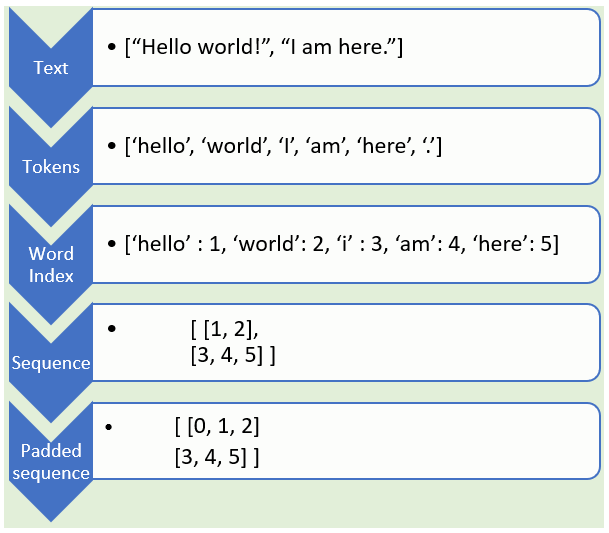

In [ ]:
SOS_token = 0 # fix token for "start of sentence"
EOS_token = 1 # fix token for "end of sentence"
PAD_token = 2 # fix token for "padding"

In [ ]:
class Vocabulary:
    def __init__(self):
        self.SOS_token = 0
        self.EOS_token = 1
        self.PAD_token = 2

        self.word2index = {"[SOS]": 0, "[EOS]": 1, "[PAD]": 2}
        self.index2word = {0: "[SOS]", 1: "[EOS]", 2: "[PAD]"}

        self.num_words = len(self.word2index)     # The number of unique vocabs in your dataset. This will be output dimension of decoder
        self.longest_sentence = 0                 # Max sequence length of dataset. This will be a seq_len, for your decoder.

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; do nothing
            pass

    def add_sentence(self, sentence, tokenize_func=None):
        if tokenize_func is None:
            tokenize_func = lambda x: x.split(" ")

        sentence_len = 0  # current sentence length
        tokens = tokenize_func(sentence)
        for word in tokens:
            sentence_len += 1
            self.add_word(word)

        if sentence_len > self.longest_sentence:
            self.longest_sentence = sentence_len # This is the longest sentence

<h3> Dataset

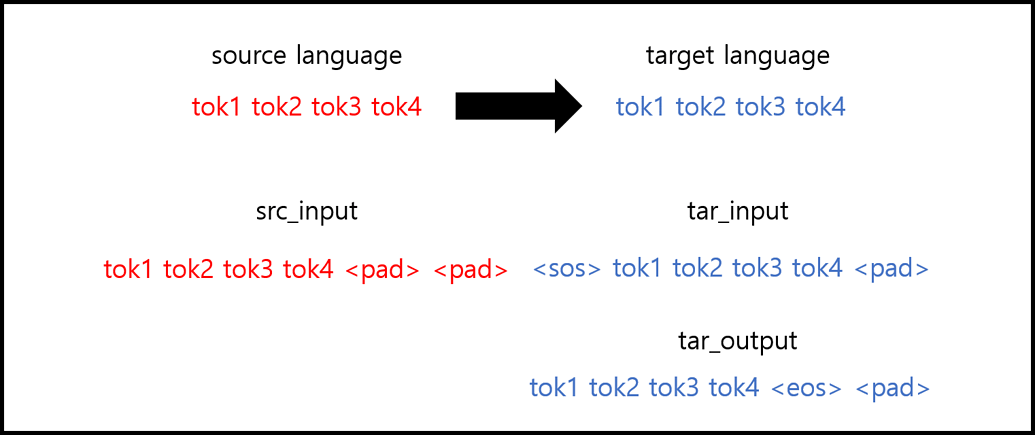

In [ ]:
from torch.utils.data import Dataset
class s2sDataset(Dataset):
    def __init__(self, data_list, tokenize_func=None):
        super(s2sDataset, self).__init__()
        """
        Args:
            data_list (list): dataset contains sources and targets
            tokenize_func (function): Funtion to tokenize sentence
        Returns:
            None
        """

        self.sources = []
        self.targets = []

        self.src_vocab = Vocabulary()
        self.trg_vocab = Vocabulary()
        
        if tokenize_func is None:
            self.tokenize_func = lambda x: x.split(" ")
        else:
            self.tokenize_func = tokenize_func

        for (src_sent, trg_sent) in data_list:
            self.sources.append(src_sent.lower())
            self.targets.append(trg_sent.lower())

            self.src_vocab.add_sentence(src_sent.lower(), tokenize_func)
            self.trg_vocab.add_sentence(trg_sent.lower(), tokenize_func)

        self.max_seq_length = max(self.src_vocab.longest_sentence, self.trg_vocab.longest_sentence)
        print(f"max sequence length is {self.max_seq_length}")

    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (source, target) where target is class_index of the target class.
        """
        source = [self.src_vocab.word2index[word] for word in self.tokenize_func(self.sources[index])]
        # source.append(self.src_vocab.EOS_token)

        if len(source) - 2 < self.max_seq_length:
            source.extend([self.src_vocab.PAD_token] * (self.max_seq_length - len(source) + 2))

        source = torch.Tensor(source).long()

        target = [self.trg_vocab.word2index[word] for word in self.tokenize_func(self.targets[index])]
        target.append(self.trg_vocab.EOS_token)

        if len(target) - 2 < self.max_seq_length:
            target.extend([self.trg_vocab.PAD_token] * (self.max_seq_length - len(target) + 2))
        target = torch.Tensor(target).long()

        return source, target

    def __len__(self):
        return len(self.sources) # should be equal

### Model

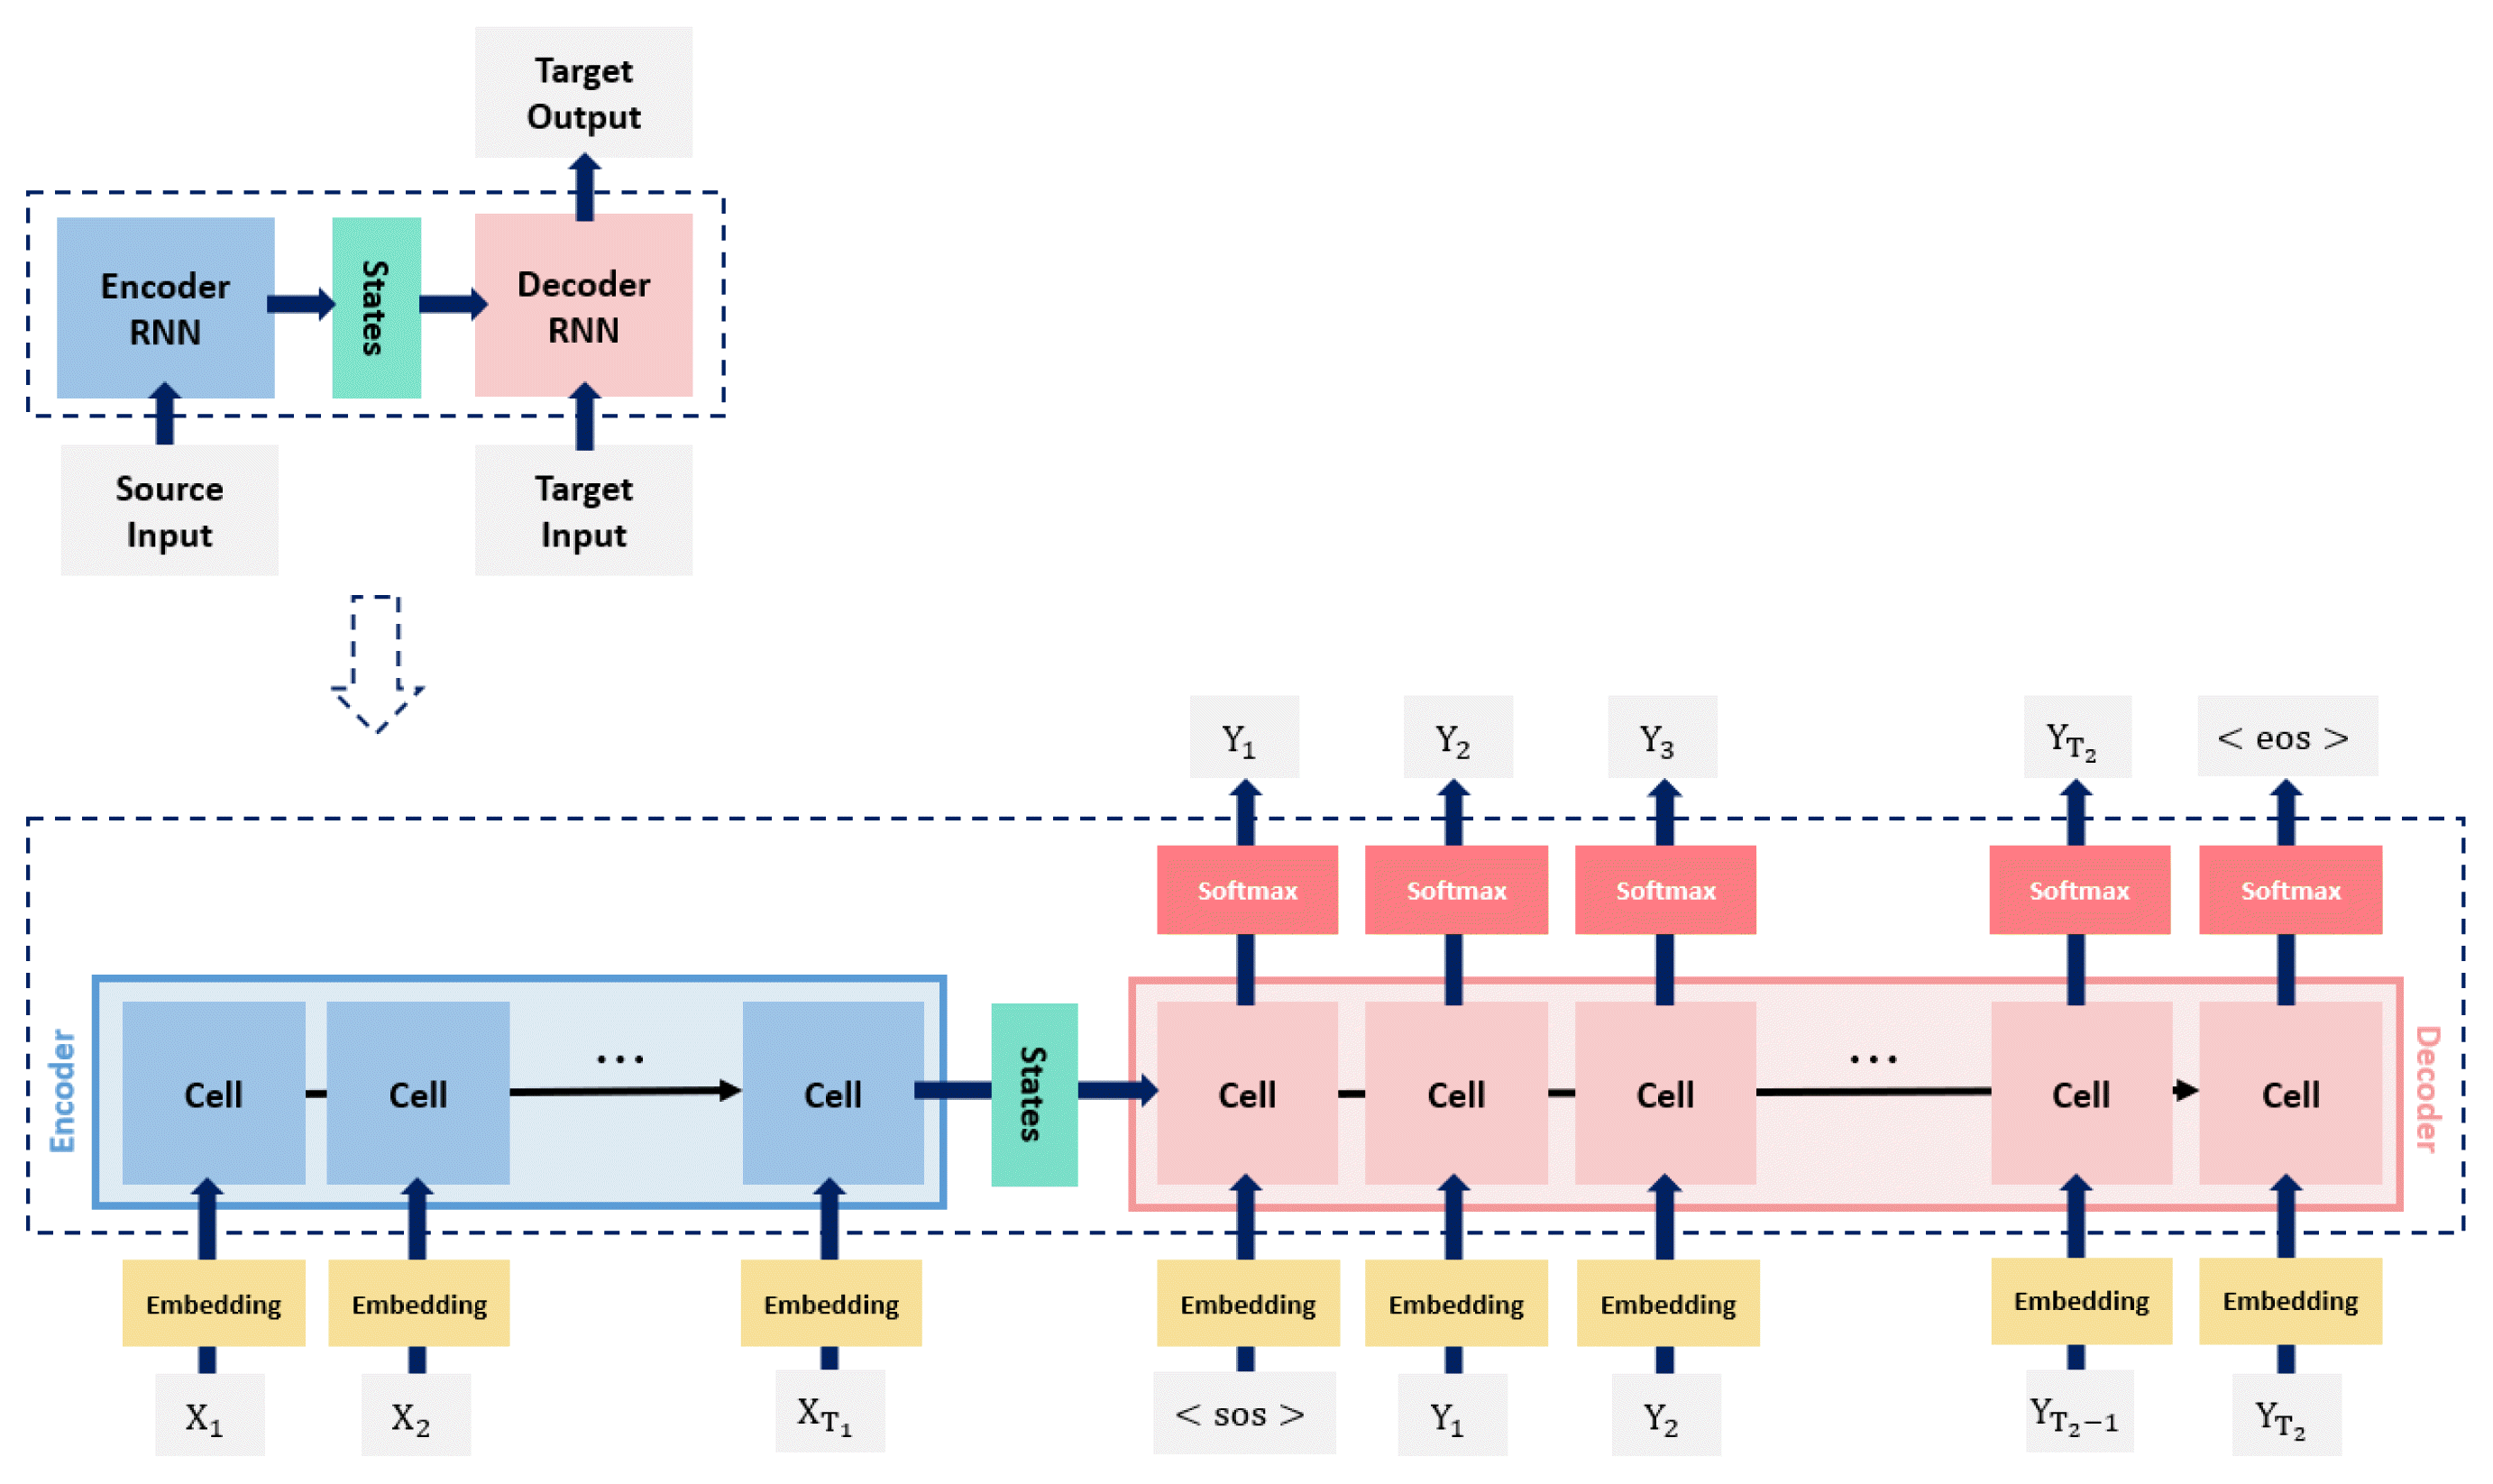

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr = 0.01)
criterion = nn.NLLLoss(ignore_index=2)

In [ ]:
for i in range(10):# 예시
    src_ex, trg_ex = dataset.__getitem__(i)
    src_ex, trg_ex = src_ex.to(device), trg_ex.to(device)
    decoded_words = model.predict(src_ex.unsqueeze(1), dataset) 

    print(' '.join([dataset.src_vocab.index2word[char_idx.item()] for char_idx in src_ex]))
    print(' '.join([dataset.trg_vocab.index2word[char_idx.item()] for char_idx in trg_ex]))
    print(' '.join([word for word in decoded_words]))

    print("*" * 50)

[SOS] pytorch is a framework for deep learning. [EOS]
파이토치는 딥러닝을 위한 프레임워크이다. [EOS] [PAD] [PAD] [PAD]
파이토치는 딥러닝을 위한 프레임워크이다. [EOS]
**************************************************
[SOS] pytorch is very clear to use. [EOS] [PAD]
파이토치는 사용하기 매우 직관적이다. [EOS] [PAD] [PAD] [PAD]
파이토치는 사용하기 매우 직관적이다. [EOS]
**************************************************
[SOS] pytorch is a framework for deep learning. [EOS]
파이토치는 딥러닝을 위한 프레임워크이다. [EOS] [PAD] [PAD] [PAD]
파이토치는 딥러닝을 위한 프레임워크이다. [EOS]
**************************************************
[SOS] pytorch is a framework for deep learning. [EOS]
파이토치는 딥러닝을 위한 프레임워크이다. [EOS] [PAD] [PAD] [PAD]
파이토치는 딥러닝을 위한 프레임워크이다. [EOS]
**************************************************
[SOS] science is very easy. [EOS] [PAD] [PAD] [PAD]
과학은 매우 쉽다. [EOS] [PAD] [PAD] [PAD] [PAD]
과학은 매우 쉽다. [EOS]
**************************************************
[SOS] pytorch is very clear to use. [EOS] [PAD]
파이토치는 사용하기 매우 직관적이다. [EOS] [PAD] [PAD] [PAD]
파이토치는 사용하기 매우 직관적이다. [EOS]
*****

## Week 13

<h3>Contents</h3>

Imbalanced dataset
- evaluation metric trap - precision recall f1

Dealing with imbalanced dataset
- technique
    - undersampling
    - oversampling

- algorithm
    - bagging
    - boosting

Augmentation


<h3>What to know</h3>

1. Macro avg F1 score!

# Thinking further

## Study more about topics

In [ ]:
# Helpful resources to study by yourself
https://canvas.skku.edu/courses/11436/discussion_topics/113914

In [ ]:
# Math
1. Linear Algebra(선형대수학)
2. Probability and Random Process(확률과랜덤프로세스),

In [ ]:
# ML
1. Introduction to Machine Learining

In [ ]:
# DL
2. Introduction to Artificial Intelligence

In [ ]:
# CS
1. Data structure(자료구조)
2. Algorithm(알고리즘)
3. Python(중,고급 파이썬)

## Overview of ML project

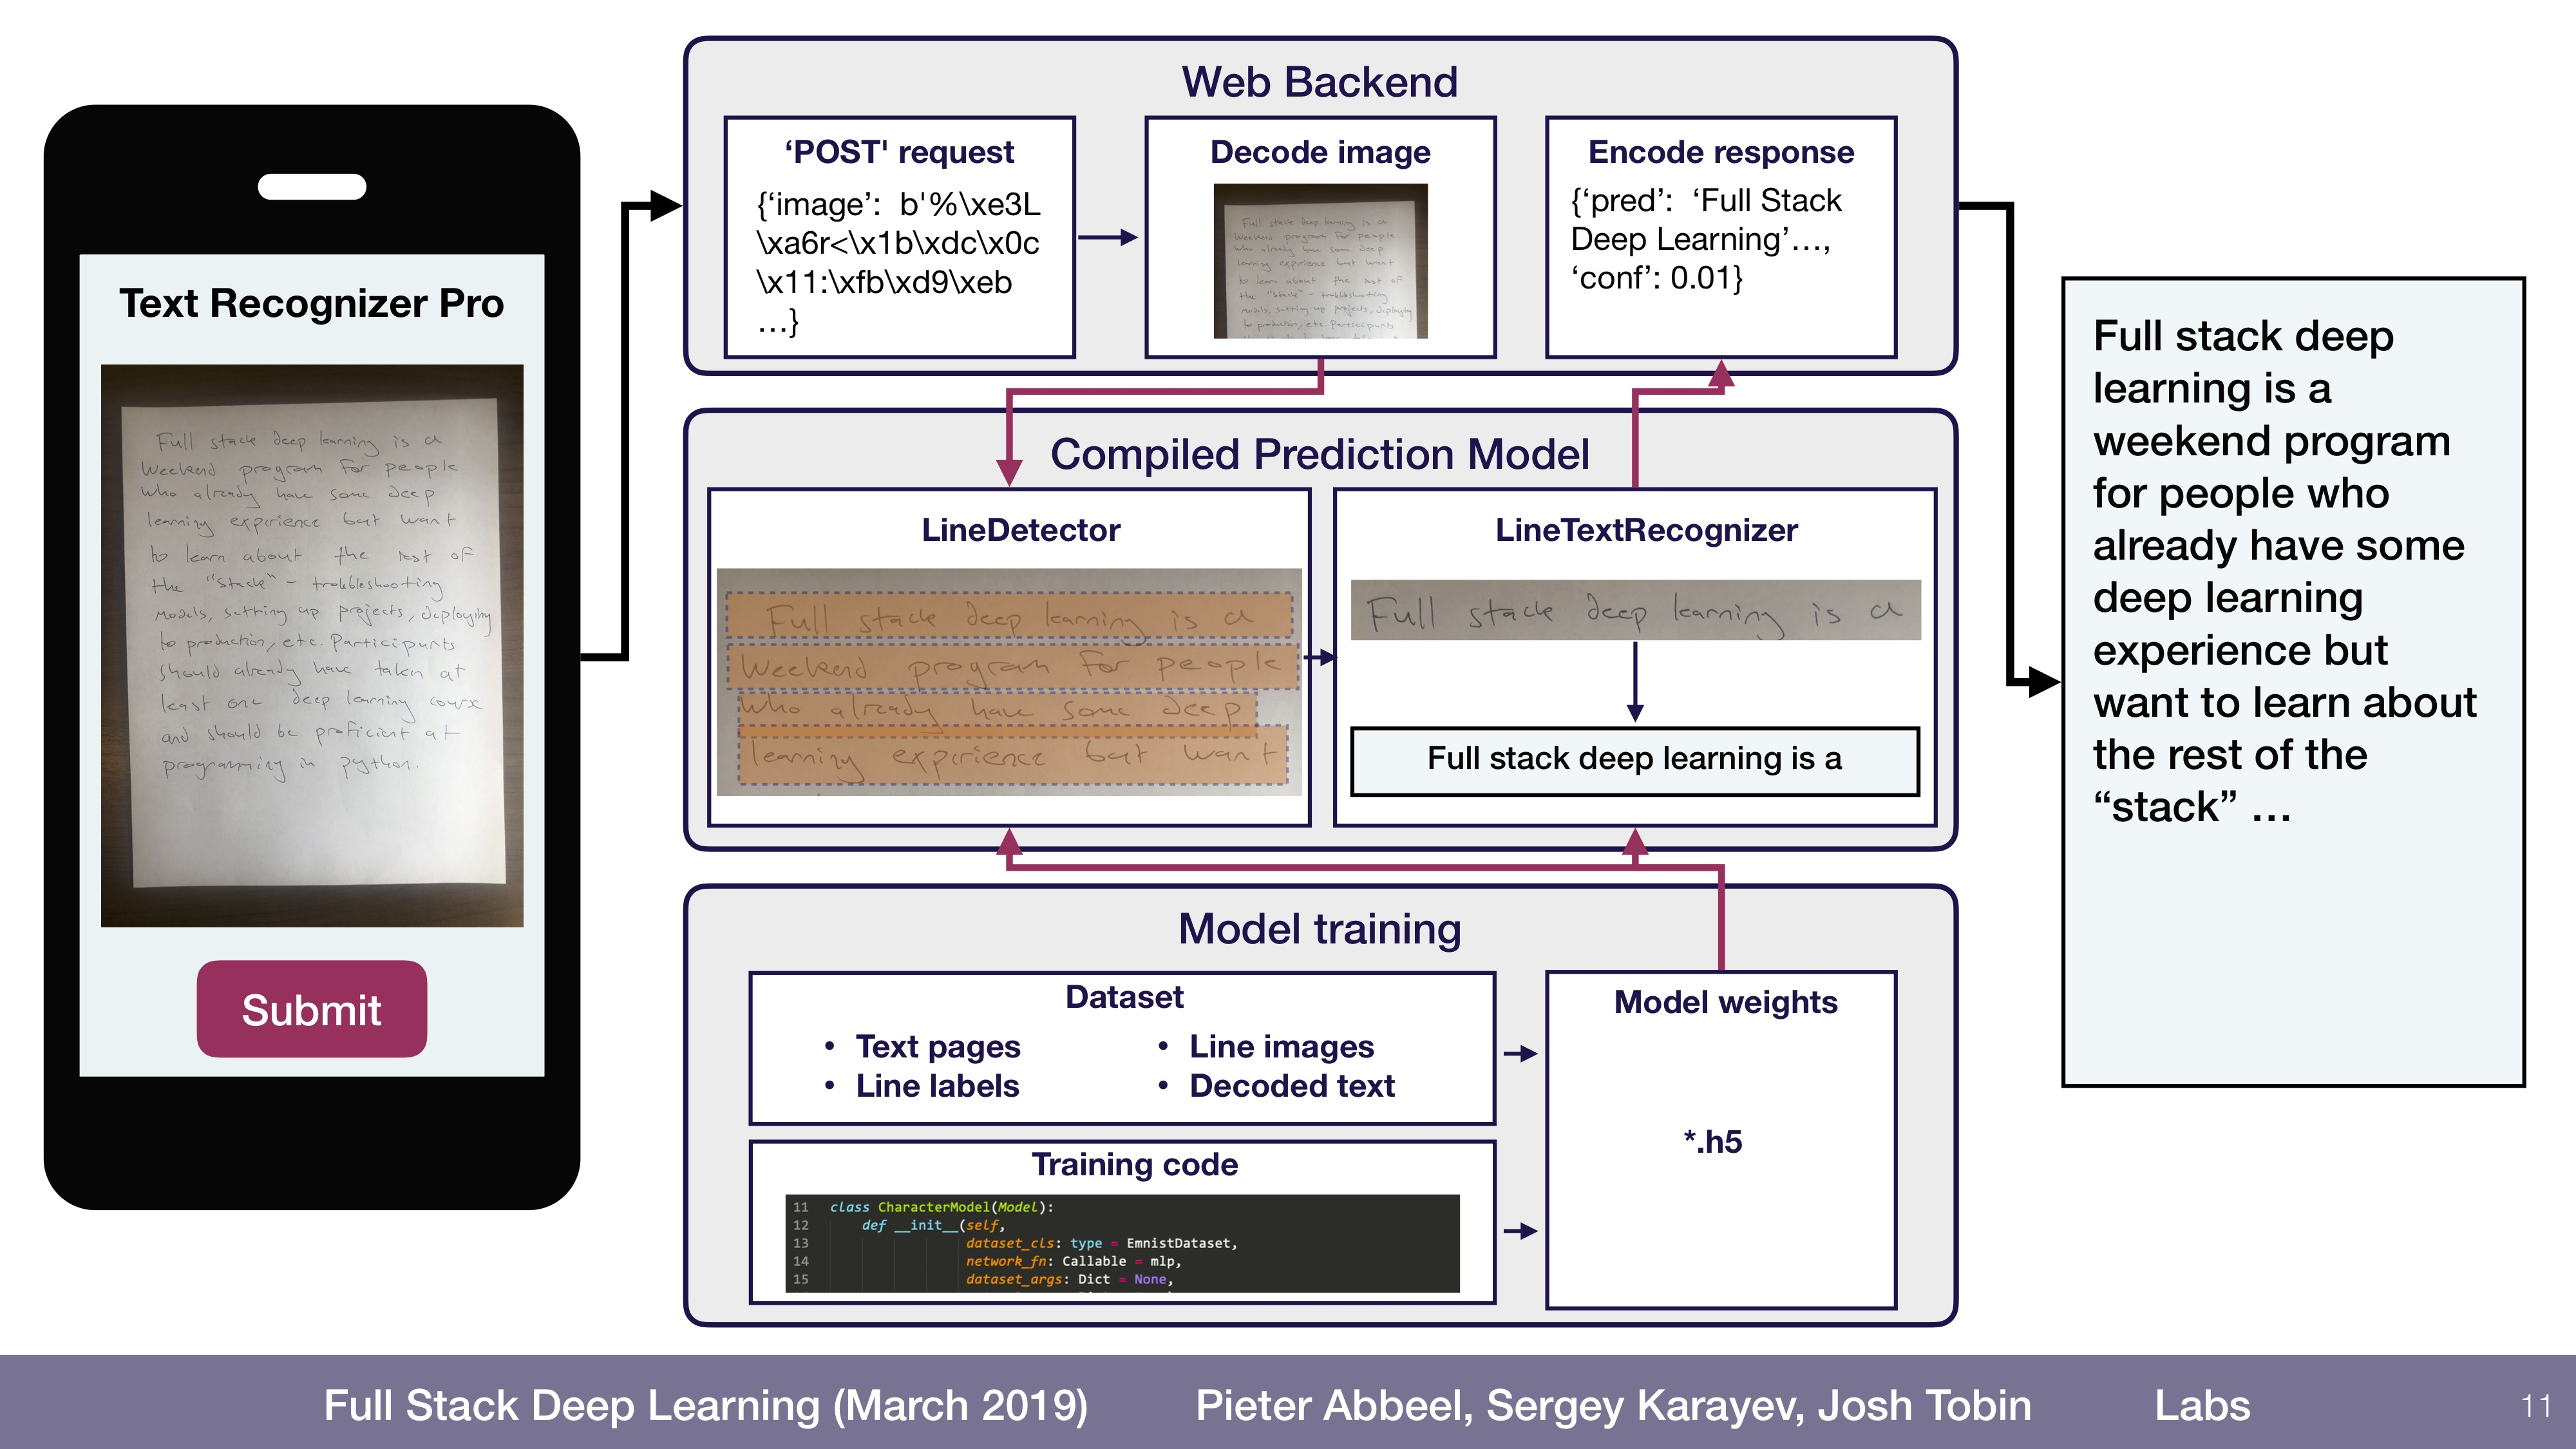

<h3>To sucessfully complete your own artificial intelligence project</h3>


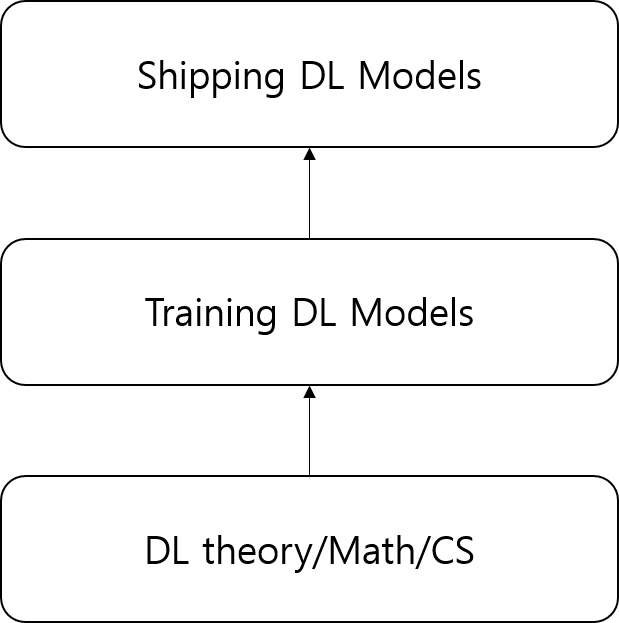

In [ ]:
for the first one, this focus mostly on the math theory the foundations and we kind of assume that you already have a lot of
those by the time that you're here 

then the second one this these ones focus a lot on the practical training and running some new experiment let's say I want to run
something on this data set and see if I can get it to work 

and finally the third one focus on how to ship projects so not
just what's maybe some new architecture idea but also how do you deploy things
how do you make sure they're easily testable maintainable you can improve
upon them where you get new data and so forth 

## Lifecycle of ML project

original reference https://youtu.be/tBUK1_cHu-8?t=155

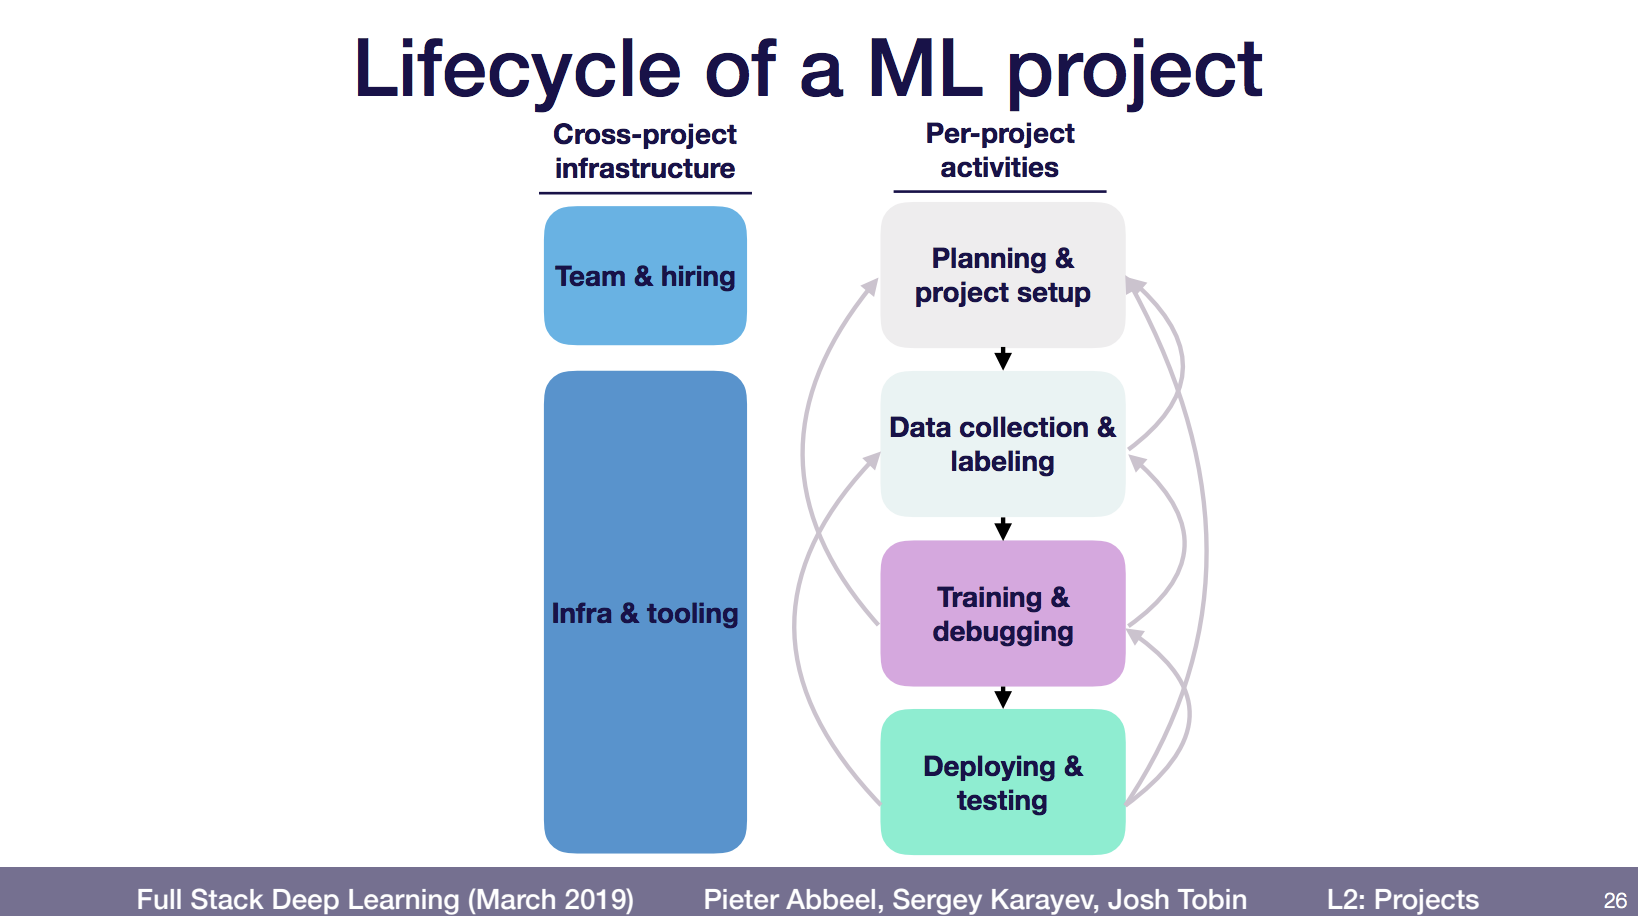

In [ ]:
머신러닝 프로젝트 Lifecycle
1) Planning & Project setup
    어떤 프로젝트를 하기로 했는지
    요구사항, 목표 설정
    얼마나 많은 자원을 가지고 있는지, 
2) Data Collection & Labeling
    데이터 수집
    센서 설치
    annotation with ground truth 등
    그러나 데이터를 얻기 너무 어려움
        go back to plannig and change dataset schema which is easier to label
3) Training & debugging
    간단한 베이스라인 구현
    SoTA 모델 찾고 구현
    구현체 디버깅
    Task에 맞도록 모델 개선
    잘 안되면 
        데이터를 더 수집
        labeling이 신뢰할 수 없음을 깨달음
        Task가 어려운 것을 깨닫고 각각의 trade off를 비교해 different way to approach / solve 고민 (planning 으로 돌아가기)
4) Deploying & testing
    프로토타입
    테스트하고 프러덕션화
    그러나 프러덕션에서 작동 안될 수 있음
        training data와 deployment의 데이터의 mismatching을 고치고
        데이터를 더 수집
    Metric & Performance
        the metric you picked doesnt actually drive the real user behavior - revisit the metric
        프러덕션시 Performance가 좋지 않음(더 빠르거나 정확해야 할까? 고민)

# Personal advice

<h1> Thank you for your hard work! </h1>

In [ ]:
it's good to bring people together who are working on similar things often
when you're working on something alone

it's much harder to make progress you might get stuck on something for a very long time 